# CA1: Dataframe Manipulation with Spotify Data

## Introduction
Pandas is an extremely powerful tool to handle large amounts of tabular data. In this compulsory assignment, you will use Pandas to explore one of the TA's personal spotify data in depth. \
\
Additional information:
- Feel free to create additional code cells if you feel that one cell per subtask is not sufficient.
- Remember, Pandas uses very efficient code to handle large amounts of data. For-loops are not efficient. If you ever have to use a for-loop to loop over the rows in the DataFrame, you have *probably* done something wrong.
- Label all graphs and charts if applicable.

## Task
I typically enjoy indie and rock music. I am a big fan of everything from old-fashioned rock and roll like Led Zeppelin and Jimi Hendrix, to newer indie artists like Joji and Lana Del Rey. This is why my spotify wrapped for 2023 came as quite a surprise:

<img src="spotifywrapped.PNG" alt="Image Description" width="20%">


Now, I'm no hater of pop music, but this was unexpected. 
For this assignment, you will investigate my listening habits, including a deep dive into my Ariana Grande listening habits, and try to find an answer to why she was my top artist; was there a fault in the spotify algorithm? Am I actually secretly an *Arianator*? (yes, I did have to look that up). Or am I just lying to myself about how often I listen to guilty pleasure music?

## Part 1: Initial loading and exploration

#### 1.0 Import necessary libraries: 
pandas, numpy, matplotlib.pyplot (other libraries such as seaborn or plotly are also allowed if you want prettier plots). It might also be a good idea to use **os** for task 2.0

In [1]:
import matplotlib.pyplot as plt
# ---- Insert other imports ----
import numpy as np
import pandas as pd
import os 

/home/idris/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/tmp/ipykernel_981403/2710941521.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 1.1 Loading the data
Load the dataset in the file `streaming_history_0.csv` into a Pandas DataFrame called `df_spotify_0`.

In [2]:
df_spotify_0 = pd.read_csv('spotify_data/streaminghistory0.csv')

#### 1.2 Help function
Use the Python command `help` to help you understand how to use the `pd.DataFrame.head` and `pd.DataFrame.tail` methods.

In [3]:
help(pd.DataFrame.head)

Help on function head in module pandas.core.generic:

head(self, n: 'int' = 5) -> 'Self'
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator

In [4]:
help(pd.DataFrame.tail)

Help on function tail in module pandas.core.generic:

tail(self, n: 'int' = 5) -> 'Self'
    Return the last `n` rows.
    
    This function returns last `n` rows from the object based on
    position. It is useful for quickly verifying data, for example,
    after sorting or appending rows.
    
    For negative values of `n`, this function returns all rows except
    the first `|n|` rows, equivalent to ``df[|n|:]``.
    
    If n is larger than the number of rows, this function returns all rows.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    type of caller
        The last `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.head : The first `n` rows of the caller object.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    

#### 1.3 Getting an overview
Print the first `five` and last `ten` rows of the dataframe. Have a quick look at which columns are in the dataset. 

In [5]:
df_spotify_0.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0
3,2022-12-06 21:05,Lorde,Team,8984.0
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0


In [6]:
df_spotify_0.tail()

,endTime,artistName,trackName,msPlayed
11954,2023-01-02 20:59,Kaizers Orchestra,Resistansen,208.0
11955,2023-01-02 20:59,Mr.Kitty,After Dark,101447.0
11956,2023-01-02 20:59,daddy's girl,after dark x sweater weather,301.0
11957,2023-01-02 20:59,daddy's girl,after dark x sweater weather,208.0
11958,2023-01-02 20:59,daddy's girl,after dark x sweater weather,789.0


#### 1.4 Formatting correctly
When working with Pandas, it's very useful to have columns which contains dates in a specific format called *datetime*. This allows for efficient manipulation and analysis of time-series data, such as sorting, filtering by date or time, and resampling for different time periods. Figure out which column(s) would be appropriate to convert to datetime, if any, and if so, perform the conversion to the correct format.

In [7]:
df_spotify_0['endTime'] = pd.to_datetime(df_spotify_0['endTime'])

#### 1.5 Unique artists
Find how many unique artists are in the dataset.


In [8]:
len(df_spotify_0.artistName.unique())

495

#### 1.6 Unique songs
Find how many unique songs are in the dataset.

In [9]:
len(df_spotify_0.trackName.unique())

1308

### Part 1: Questions
Q1: Which columns are in the dataset?

The columns in the dataset are: endTime, artistName, trackName and msPlayed

Q2: What timeframe does the dataset span?

The dataset starts from 2022-12-03 02:02:00 to 2023-01-02 20:59:00, so about a month.

Q3: How many unique artists are in the dataset?

There are 495 unique artists in the dataset.

Q4: How many unique songs are in the dataset?

There are 1308 unique songs in the dataset.

## Part 2: Working with all the data

#### 2.0 Importing all the dataframes
In Task 1, you only worked with about a month worth of data. Now, you will work with over a year worth. 

In the *spotify_data* folder, there is more than just one listening record. Load each of the 14 listening records into a dataframe (1 dataframe per listening record), and concatenate them together into one large dataframe named `df`.

In [10]:
df_all = pd.concat(
    map(pd.read_csv, ['spotify_data/streaminghistory{0}.csv'.format(i) for i in range(14)]), ignore_index=True)

df_all.tail()

,endTime,artistName,trackName,msPlayed
167434,2023-12-07 21:13,Lana Del Rey,Art Deco,38298.0
167435,2023-12-07 21:13,Ariana Grande,off the table (with The Weeknd),13448.0
167436,2023-12-07 21:14,Ariana Grande,my hair,23757.0
167437,2023-12-07 21:14,Leonard Cohen,Thanks for the Dance,9317.0
167438,2023-12-07 21:17,The Vaccines,Your Love Is My Favourite Band,14661.0


In [11]:
 pd.to_datetime(df_all['endTime'])

0        2022-12-03 02:02:00
1        2022-12-03 02:02:00
2        2022-12-06 21:05:00
3        2022-12-06 21:05:00
4        2022-12-06 21:05:00
                 ...        
167434   2023-12-07 21:13:00
167435   2023-12-07 21:13:00
167436   2023-12-07 21:14:00
167437   2023-12-07 21:14:00
167438   2023-12-07 21:17:00
Name: endTime, Length: 167439, dtype: datetime64[ns]

#### 2.1 Sorting by time
Datasets often aren't perfect. One example of an issue that could occur is that the time-based data might not be in chronological order. If this were to happen, the rows in your dataframe could be in the wrong order. To ensure this isn't an issue in your dataframe, you should sort the dataframe in chronological order, from oldest to newest.

In [12]:
df_all = df_all.sort_values(by='endTime')

#### 2.2 Setting a timeframe
For this investigation, we are only interested in investigating listening patterns from **2023**. Remove any data not from **2023** from the DataFrame.

In [13]:
df_2023 = df_all[df_all.endTime.between('2023-01-01 00:00', '2023-12-12 21:17')]
df_2023

,endTime,artistName,trackName,msPlayed
10881,2023-01-01 01:17,Ariana Grande,7 rings,139.0
10882,2023-01-01 01:17,Ariana Grande,7 rings,487.0
10883,2023-01-01 01:17,Ariana Grande,positions,417.0
10884,2023-01-01 01:17,Peach Pit,Being so Normal,2205.0
10885,2023-01-01 01:17,Kelly Clarkson,"Santa, Can’t You Hear Me",278.0
...,...,...,...,...
167429,2023-12-07 21:13,Arctic Monkeys,Snap Out Of It,1497.0
167435,2023-12-07 21:13,Ariana Grande,off the table (with The Weeknd),13448.0
167437,2023-12-07 21:14,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14,Ariana Grande,my hair,23757.0


#### 2.3 Deleting rows
Often in Data Science, you will encounter when a row entry has the value *NaN*, indicating missing data. These entries can skew your analysis, leading to inaccurate conclusions. For this task, identify and remove any rows in your DataFrame that contain NaN values. \
Later in the course, you might encounter other techniques of dealing with missing data, typically reffered to as *data imputation*. Here, though, you are just supposed to delete the entire rows with missing data.

In [14]:
df_all.tail()

,endTime,artistName,trackName,msPlayed
167435,2023-12-07 21:13,Ariana Grande,off the table (with The Weeknd),13448.0
167437,2023-12-07 21:14,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14,Ariana Grande,my hair,23757.0
167438,2023-12-07 21:17,The Vaccines,Your Love Is My Favourite Band,14661.0
164529,NaN,The Lumineers,Ophelia,371.0


In [15]:
df_all = df_all.dropna().copy()
df_all.tail()

,endTime,artistName,trackName,msPlayed
167429,2023-12-07 21:13,Arctic Monkeys,Snap Out Of It,1497.0
167435,2023-12-07 21:13,Ariana Grande,off the table (with The Weeknd),13448.0
167437,2023-12-07 21:14,Leonard Cohen,Thanks for the Dance,9317.0
167436,2023-12-07 21:14,Ariana Grande,my hair,23757.0
167438,2023-12-07 21:17,The Vaccines,Your Love Is My Favourite Band,14661.0


#### 2.4 Convert from milliseconds to seconds
From `msPlayed`, create a new column `secPlayed` with the data converted from milliseconds to seconds. Then delete the column `msPlayed`.

In [16]:
df_all['secPlayed'] = df_all['msPlayed'] * 0.001
df_all

,endTime,artistName,trackName,msPlayed,secPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30000.0,30.000
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8210.0,8.210
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37895.0,37.895
3,2022-12-06 21:05,Lorde,Team,8984.0,8.984
4,2022-12-06 21:05,Ariana Grande,Into You,1221.0,1.221
...,...,...,...,...,...
167429,2023-12-07 21:13,Arctic Monkeys,Snap Out Of It,1497.0,1.497
167435,2023-12-07 21:13,Ariana Grande,off the table (with The Weeknd),13448.0,13.448
167437,2023-12-07 21:14,Leonard Cohen,Thanks for the Dance,9317.0,9.317
167436,2023-12-07 21:14,Ariana Grande,my hair,23757.0,23.757


In [17]:
df_all = df_all.drop('msPlayed', axis=1)
df_all

,endTime,artistName,trackName,secPlayed
0,2022-12-03 02:02,Cigarettes After Sex,Truly,30.000
1,2022-12-03 02:02,Leonard Cohen,Take This Waltz - Paris Version,8.210
2,2022-12-06 21:05,Vlad Holiday,So Damn Into You,37.895
3,2022-12-06 21:05,Lorde,Team,8.984
4,2022-12-06 21:05,Ariana Grande,Into You,1.221
...,...,...,...,...
167429,2023-12-07 21:13,Arctic Monkeys,Snap Out Of It,1.497
167435,2023-12-07 21:13,Ariana Grande,off the table (with The Weeknd),13.448
167437,2023-12-07 21:14,Leonard Cohen,Thanks for the Dance,9.317
167436,2023-12-07 21:14,Ariana Grande,my hair,23.757


#### 2.5 Finding top 10 favorite artists
Find the top `ten` artists with the highest total play time (in seconds). Plot your findings in a bar graph. \
(hint: start by creating a new DataFrame with only `artistName` and your time column. To proceed, you will also likely need the `groupby` command from Pandas.)

<Axes: xlabel='artistName'>

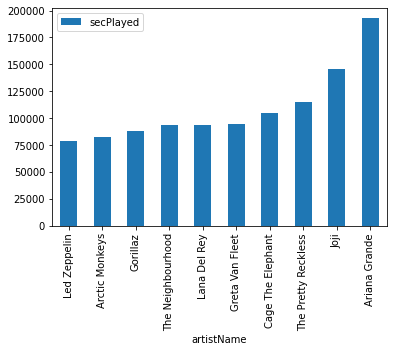

In [18]:
import seaborn as sns

df_artists_time = df_all[['artistName', 'secPlayed']]
sum_play_artists = df_artists_time.groupby(['artistName']).secPlayed.sum().reset_index()
sum_play_artists = sum_play_artists.sort_values('secPlayed')
top_10_artists = sum_play_artists.tail(10)

top_10_artists.plot.bar(x='artistName', y='secPlayed')

#### 2.6 Finding top 10 favorite songs
Find the top `ten` songs with the highest play time. Create a graph visualizing the results.

<Axes: xlabel='artistName'>

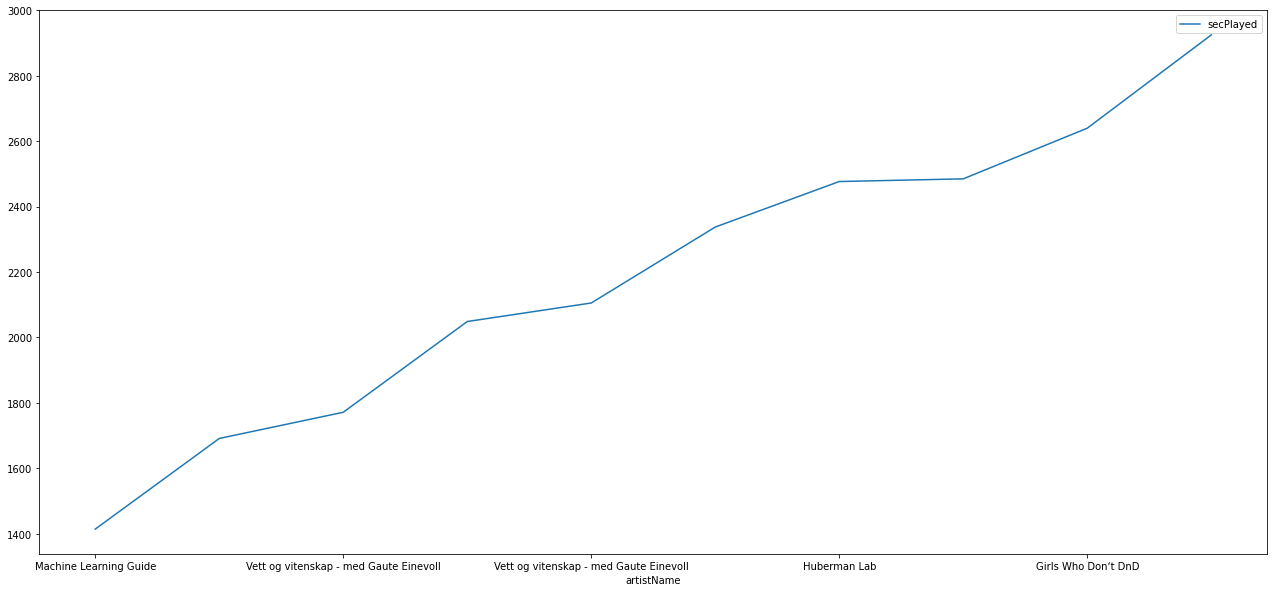

In [19]:
df_artists_time = df_artists_time.sort_values(by='secPlayed')
top_10_songs = df_artists_time.tail(10)

top_10_songs.plot(x='artistName', y='secPlayed', figsize=(22, 10))

## Part 3: Further analysis

#### 3.0 Average listening time by hour
Generate a plot that displays the average amount of time that music is played for each hour of the day.

In [20]:
df_all['endTime'] = pd.to_datetime(df_all['endTime'])
df_all

,endTime,artistName,trackName,secPlayed
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30.000
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8.210
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37.895
3,2022-12-06 21:05:00,Lorde,Team,8.984
4,2022-12-06 21:05:00,Ariana Grande,Into You,1.221
...,...,...,...,...
167429,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,1.497
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9.317
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23.757


In [21]:
df_all['hour'] = df_all['endTime'].dt.hour
hourly_avg = df_all.groupby('hour')['secPlayed'].mean()

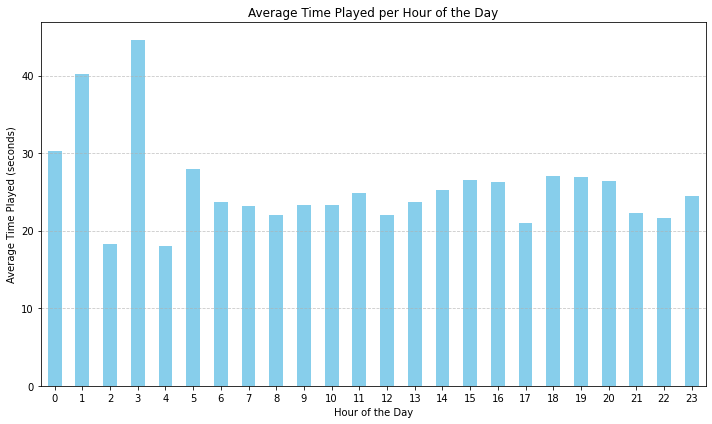

In [22]:
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Time Played per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Time Played (seconds)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 3.1 Morning music and evening music
I think many people find that some types of music are more suitable for morning listening and some music is more suitable for evening listening. Create a plot that compares the play time of the artists *Leonard Cohen* and *Rage Against the Machine* on an hour-by-hour basis. See if there are any differences.

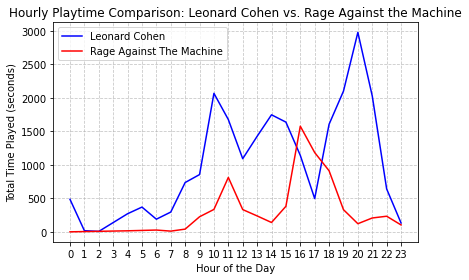

In [23]:
leo_df = df_all[df_all['artistName'] == 'Leonard Cohen']
rage_df = df_all[df_all['artistName'] == 'Rage Against The Machine']


leo_hour_play = leo_df.groupby('hour')['secPlayed'].sum()
rage_hour_play = rage_df.groupby('hour')['secPlayed'].sum()


leo_hour_play.plot(label='Leonard Cohen', color='blue')
rage_hour_play.plot(label='Rage Against The Machine', color='red')

plt.title('Hourly Playtime Comparison: Leonard Cohen vs. Rage Against the Machine')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Time Played (seconds)')
plt.xticks(range(24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 3.2 Analysing skipped songs
Determining whether a song was skipped or listened to can be challenging. For this analysis, we'll simplify by defining a skipped song as any track played for less than 30 seconds. Conversely, a song played for 30 seconds or more is considered listened to. \
 Add a column to your DataFrame to reflect this criteria: set the value to 1 if the song was played for less than 30 seconds (indicating a skipped song), and 0 if it was played for 30 seconds or longer.

In [24]:
def skipped_song(playtime):
    if playtime < 30:
        return 1
    else:
        return 0

df_all['skipped song'] =  df_all['secPlayed'].apply(skipped_song)
df_all

,endTime,artistName,trackName,secPlayed,hour,skipped song
0,2022-12-03 02:02:00,Cigarettes After Sex,Truly,30.000,2,0
1,2022-12-03 02:02:00,Leonard Cohen,Take This Waltz - Paris Version,8.210,2,1
2,2022-12-06 21:05:00,Vlad Holiday,So Damn Into You,37.895,21,0
3,2022-12-06 21:05:00,Lorde,Team,8.984,21,1
4,2022-12-06 21:05:00,Ariana Grande,Into You,1.221,21,1
...,...,...,...,...,...,...
167429,2023-12-07 21:13:00,Arctic Monkeys,Snap Out Of It,1.497,21,1
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448,21,1
167437,2023-12-07 21:14:00,Leonard Cohen,Thanks for the Dance,9.317,21,1
167436,2023-12-07 21:14:00,Ariana Grande,my hair,23.757,21,1


#### 3.3 Plotting skipped songs
Create a pie-chart that compares amount of skipped songs to amount of non-skipped songs.

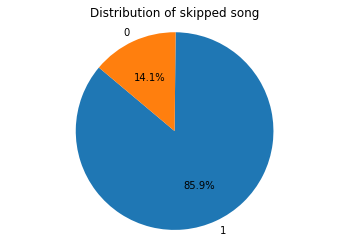

In [25]:
skip_count = df_all['skipped song'].value_counts()
plt.pie(skip_count, labels=skip_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of skipped song')
plt.axis('equal') 
plt.show()

#### 3.4 Artists by percentage of songs skipped
For each artist in the dataset, calculate which percentage of their songs was skipped. Store this information in a new DataFrame called `df_skipped`. Store the percentage of skipped songs in a new column named `SkipRate`\
\
**Example**: If an artist has **100** songs in your dataset and **25** of these were skipped, the percentage of skipped songs for this artist would be $\frac{25}{100}=25\%$

In [26]:
artist_song_count = df_all.groupby('artistName')['trackName'].count()

skipped_songs = df_all[df_all['skipped song'] == 1].groupby('artistName').size()

skip_rate = (skipped_songs / artist_song_count) * 100

df_skipped = pd.DataFrame({'artisName': artist_song_count.index, 'Total songs': artist_song_count, 
                          'Skipped songs': skipped_songs, 
                         'Skip rate': skip_rate})

df_skipped

,artisName,Total songs,Skipped songs,Skip rate
artistName,,,,
10cc,10cc,29,19,65.517241
1930,1930,2,1,50.000000
2Pac,2Pac,516,445,86.240310
3 Doors Down,3 Doors Down,2,1,50.000000
4 Non Blondes,4 Non Blondes,134,97,72.388060
...,...,...,...,...
squeeda,squeeda,3,2,66.666667
tenkousei.,tenkousei.,41,40,97.560976
trxxshed,trxxshed,2,1,50.000000


#### 3.5 Comparing artists by skip-rate 
Find the `three` top artists with the lowest skip-rate and the `three` with the highest. Print their names, along with their skip-rate.

In [27]:
df_skipped = df_skipped.sort_values(by='Skip rate')
top_3 = df_skipped.head(3)
bot_3 = df_skipped.tail(3)

top_3[['Skip rate']]

,Skip rate
artistName,
Roc Boyz,11.111111
LACES,13.333333
Basstrologe,20.000000


In [28]:
bot_3[['Skip rate']]

,Skip rate
artistName,
Dire Straits,100.0
Cocteau Twins,100.0
WILLOW,100.0


## Part a Data Scientist - The Ariana Deep-Dive

#### 4.0 Ariana-DataFrame: 
Create a new DataFrame called *df_ariana*, containing only rows with music by Ariana Grande.

In [29]:
df_ariana = df_all[df_all['artistName'] == 'Ariana Grande']

df_ariana

,endTime,artistName,trackName,secPlayed,hour,skipped song
4,2022-12-06 21:05:00,Ariana Grande,Into You,1.221,21,1
9,2022-12-07 00:21:00,Ariana Grande,Best Mistake,8.824,0,1
17,2022-12-07 00:25:00,Ariana Grande,safety net (feat. Ty Dolla $ign),17.838,0,1
15,2022-12-07 00:25:00,Ariana Grande,Just A Little Bit Of Your Heart,0.557,0,1
26,2022-12-07 00:26:00,Ariana Grande,shut up,15.282,0,1
...,...,...,...,...,...,...
167415,2023-12-07 17:46:00,Ariana Grande,Almost Is Never Enough,28.483,17,1
167422,2023-12-07 20:51:00,Ariana Grande,needy,26.220,20,1
167428,2023-12-07 21:13:00,Ariana Grande,pete davidson,0.603,21,1
167435,2023-12-07 21:13:00,Ariana Grande,off the table (with The Weeknd),13.448,21,1


#### 4.1 Average skip rate
Create a histogram of the distribution of the skip-rate values of the different artists in your DataFrame  `df_skipped`, with skip rates on one axis and number of artists on the other. \
\
Then, retrieve the skip rate for Ariana Grande from your DataFrame `df_skipped`. Run the code in the cell below. Where on this distribution does Ariana Grande fall? Do I skip her songs more than average, or less?

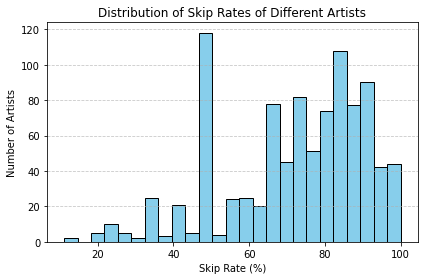

In [30]:
plt.hist(df_skipped['Skip rate'], bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Skip Rates of Different Artists')
plt.xlabel('Skip Rate (%)')
plt.ylabel('Number of Artists')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [31]:
df_skipped.loc[['Ariana Grande']]

,artisName,Total songs,Skipped songs,Skip rate
artistName,,,,
Ariana Grande,Ariana Grande,20633,20533,99.51534


### Part 4: Questions
Q1: Did I skip a lot of Ariana Grande's songs, or did I not, compared to the rest of the dataset? \

From the retrieved data we see that about 99.5 % of Ariana Grande songs were skipped.

Q2: What might be some possible reasons for Ariana Grande to be my nr.1 artist?

I suspect that the reason for why she was number 1 is because the amount times her songs have been played. 

In [32]:
df_skipped.sort_values(by='Total songs')

,artisName,Total songs,Skipped songs,Skip rate
artistName,,,,
Flyte,Flyte,2,1,50.000000
bôa,bôa,2,1,50.000000
MoonDeity,MoonDeity,2,1,50.000000
mtch.,mtch.,2,1,50.000000
Charles Bradley,Charles Bradley,2,1,50.000000
...,...,...,...,...
The Neighbourhood,The Neighbourhood,3261,2674,81.999387
The Pretty Reckless,The Pretty Reckless,3449,2714,78.689475
Joji,Joji,3865,2899,75.006468


Although these songs may not meet the threshold of 30 seconds of playtime, it's worth considering that they might still contribute significantly to the overall playtime. Additionally, they could potentially influence Spotify's algorithm for determining the user's top artist, either through cumulative playtime or frequency of song plays.